In [1]:
%pylab
%matplotlib inline


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import jsonlines
import math
import numpy as np

In [3]:
def analysis(filename):
    costhetas = []
    for i,e in enumerate(jsonlines.Reader(open(filename))):
        els = [p for p in e['particles'] if p['id'] == 11]
        mus = [p for p in e['particles'] if p['id'] == 13]
        assert len(mus) == 1
        assert len(els) == 1
        mu = mus[0]
        el = els[0]
        el_px, el_py, el_pz = [el[x] for x in ['px','py','pz']]
        mu_px, mu_py, mu_pz = [mu[x] for x in ['px','py','pz']]
        costheta = mu_pz/el_pz
        costhetas.append(costheta)
    return costhetas

In [4]:
mod, nominal = [analysis(fn) for fn in ['gf_mod.jsonl','gf_nominal.jsonl']]

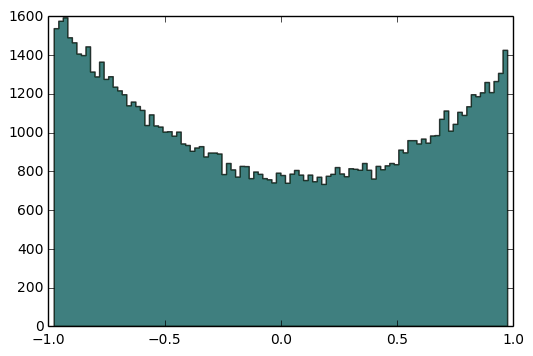

In [5]:
_,bins,_ = plt.hist(mod, bins = 100, histtype='stepfilled', alpha = 0.5)
_,_,_ = plt.hist(nominal, bins = bins, histtype='stepfilled', alpha = 0.5)

In [6]:
plt.savefig('plot.png')